# DataViz #4


Air quality has a big impact over our health. In this notebook you will explore data about potentially harmfull emissions throughout the world.  
The data is provided by OpenAQ which references air quality indicators from sensors disseminated in 49K locations in more than 150 countries around the world.  


> "OpenAQ is the Wikipedia of Air Quality."

_IAN SCHULER  
CEO / Development Seed / Washington, DC USA_

## API exploration and request

### Resources

- requests library https://requests.readthedocs.io/en/latest/user/quickstart/
- le site OpenAQ: https://openaq.org/#/  
- API docs  https://docs.openaq.org/  
- API endpoints  https://docs.openaq.org/  

### ToDo

After installing `requests` use it to carry out API requests on the endpoints as discussed in the kit élève.

- http://perdu.com
- https://api.openaq.org/v2/summary


In [1]:
# Install and import the python library 'requests'

### Your code starts here
import requests 
requests.__version__
### Your code ends here

'2.27.1'

In [2]:
r = requests.get('http://perdu.com')
print(r.text)

<html><head><title>Vous Etes Perdu ?</title></head><body><h1>Perdu sur l'Internet ?</h1><h2>Pas de panique, on va vous aider</h2><strong><pre>    * <----- vous &ecirc;tes ici</pre></strong></body></html>



In [3]:
# Use the 'get' method from the requests library for 'perdu.com', store the result in a variable named resp_1 and print out the status_code

### Your code starts here
resp_1 = requests.get('http://perdu.com')
resp_1_status_code = resp_1.status_code
### Your code ends here

print(f"{resp_1_status_code = }")
print(f"{resp_1.text = }")

resp_1_status_code = 200
resp_1.text = "<html><head><title>Vous Etes Perdu ?</title></head><body><h1>Perdu sur l'Internet ?</h1><h2>Pas de panique, on va vous aider</h2><strong><pre>    * <----- vous &ecirc;tes ici</pre></strong></body></html>\n"


Congratulations with carying out this first request!  
Now let's get back to OpenAQ... 

In [4]:
# In the following request we will retreive a json (JavaScript Object Notation) string
# which we can then parse and handle in the same way as a Python dictionary!

# the 'base_url' variable below is used as root from which all the other endpoints of the API can be accessed:
base_url = "https://api.openaq.org/v2"
# -> use the API endpoint which provides a "summary" of the data stored on OpenAQ's servers to complete the base_url
endpoint = "/summary"

### Your code starts here
resp_3 = requests.get(base_url+endpoint)
resp_3_status_code = resp_3.status_code
resp_3_json = resp_3.json()
### Your code ends here

print(f"{resp_3_status_code = }\n")
print(f"{isinstance(resp_3_json, dict) = }\n")
print(f"{resp_3_json = }") 

resp_3_status_code = 200

isinstance(resp_3_json, dict) = True

resp_3_json = {'meta': {'name': 'openaq-api', 'license': 'CC BY 4.0d', 'website': 'api.openaq.org', 'page': 1, 'limit': 1000, 'found': 1}, 'results': [{'count': 22521788416, 'cities': 3111, 'sources': 425, 'countries': 159, 'locations': 52536}]}


This json object (or python dictionary) is already something, but why not make the data returned in the request even more intelligible and easy to process?! Now that the data is accessible locally in this notebook, we can take advantage of the entire processing power of python and the pandas library!

In [5]:
# Install and import the pandas library and create a dataframe from the 'results' list returned in the json object from the previous request

### Your code starts here
import pandas as pd 
df_summary = pd.DataFrame(resp_3_json['results'])
### Your code ends here

print(f"check: {all(df_summary.columns == ['count', 'cities', 'sources', 'countries', 'locations']) = }")
df_summary.head()

check: all(df_summary.columns == ['count', 'cities', 'sources', 'countries', 'locations']) = True


,count,cities,sources,countries,locations
0,22521788416,3111,425,159,52536


Now you know the basics to interact with OpenAQ's API and retreive usefull data to answer all the questions you might be having about air quality throughout the world!  
Don't hesitate to play around with the **'Try it out'** button in their API documentation, it will give you usefull information about how to write the urls for your particular requests.

## A vous de jouer!

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px

In [7]:
base_url = "https://api.openaq.org/v2"

In [8]:
parametres = requests.get(base_url + '/parameters')
parametres_json = parametres.json()['results']
df_parameters = pd.DataFrame(parametres_json)
df_parameters

,id,name,displayName,description,preferredUnit,isCore,maxColorValue
0,1,pm10,PM10,Particulate matter less than 10 micrometers in...,µg/m³,True,275.000000
1,2,pm25,PM2.5,Particulate matter less than 2.5 micrometers i...,µg/m³,True,110.000000
2,3,o3,O₃ mass,Ozone mass concentration,µg/m³,False,312.764191
3,4,co,CO mass,Carbon Monoxide mass concentration,µg/m³,False,12163.042264
4,5,no2,NO₂ mass,Nitrogen Dioxide mass concentration,µg/m³,False,1180.761937
5,6,so2,SO₂ mass,Sulfur Dioxide mass concentration,µg/m³,False,556.024526
6,7,no2,NO₂,Nitrogen Dioxide concentration,ppm,True,0.650000
7,8,co,CO,Carbon Monoxide concentration,ppm,True,11.000000
8,9,so2,SO₂,Sulfur Dioxide concentration,ppm,True,0.220000
9,10,o3,O₃,Ozone concentration,ppm,True,0.165000


In [9]:
pays = requests.get(base_url + '/countries')
pays_json = pays.json()['results']
df_pays = pd.DataFrame(pays_json)
df_pays[df_pays['name']=='Sweden']

,code,name,locations,firstUpdated,lastUpdated,parameters,count,cities,sources
125,SE,Sweden,104,2017-02-08T01:00:00+00:00,2022-07-21T12:06:08+00:00,"[co, no2, o3, pm1, pm10, pm25, so2, um010, um0...",34650987,16,3


In [10]:
# methan_us = requests.get('https://api.openaq.org/v2/measurements?date_from=2000-01-01T00%3A00%3A00%2B00%3A00&date_to=2022-07-21T09%3A35%3A00%2B00%3A00&limit=150&page=1&offset=0&sort=desc&parameter=ch4&radius=1000&country_id=US&order_by=datetime')
# df_methan_us = pd.DataFrame(methan_us.json()['results'])
# df_methan_us

In [11]:
# Utiliser un dictionnaire avec les parametres pour n epas copie coller l'URL 
payload1 = {'limit': 10000, 'country_id' : 'FR', 'parameter': 'co'}
req_cofr = requests.get(base_url + '/measurements', params = payload1)
df_cofr = pd.DataFrame(req_cofr.json()['results'])

df_cofr

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,3468,FR10034,co,185.0,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 51.0244512162806, 'longitude': 2....",FR,Nord,False,False,government,reference grade
1,3479,FR05083,co,161.0,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.5027376236243, 'longitude': 0....",FR,Seine-Maritime,False,False,government,reference grade
2,2680,FR20069,co,106.0,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 45.7748381342459, 'longitude': 4....",FR,Rhône,False,False,government,reference grade
3,3598,FR11034,co,240.0,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 50.7065553864362, 'longitude': 3....",FR,Nord,False,False,government,reference grade
4,3673,FR09404,co,427.0,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 46.5839094193576, 'longitude': 0....",FR,Vienne,False,False,government,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,3673,FR09404,co,270.0,"{'utc': '2022-05-01T05:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 46.5839094193576, 'longitude': 0....",FR,Vienne,False,False,government,reference grade
12560,3731,FR16069,co,120.0,"{'utc': '2022-05-01T05:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 47.7476802263183, 'longitude': 7....",FR,Haut-Rhin,False,False,government,reference grade
12561,2680,FR20069,co,130.0,"{'utc': '2022-05-01T04:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 45.7748381342459, 'longitude': 4....",FR,Rhône,False,False,government,reference grade
12562,3999,FR34047,co,277.0,"{'utc': '2022-05-01T04:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 48.760911372973, 'longitude': 1.2...",FR,Eure-et-Loir,False,False,government,reference grade


In [12]:
# making a loop to create 3 df per country 
# df = pd.DataFrame(columns=['locationId', 'location', 'parameter', 'value', 'date', 'unit', 'coordinates', 'country', 'city', 'isMobile', 'isAnalysis', 'entity', 'sensorType'])
# pays_list = ['PT', 'FR', 'SE']
# for country in pays_list:
#     payload2 = {'limit': 10000, 'country_id' : country, 'parameter': 'co'}
#     req = requests.get(base_url + '/measurements', params = payload2)
#     df_req = pd.DataFrame(req.json()['results'])
#     df = pd.concat([df, df_req], ignore_index=True)

# df

In [13]:
payload3 = {'limit': 10000, 'country_id' : 'SE', 'parameter': 'co'}
req_cose = requests.get(base_url + '/measurements', params = payload3)
df_cose = pd.DataFrame(req_cose.json()['results'])

df_cose

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,9474,SE0027A,co,379.18300,"{'utc': '2022-07-21T10:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
1,9474,SE0027A,co,400.34300,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
2,9474,SE0027A,co,380.97400,"{'utc': '2022-07-21T08:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
3,9474,SE0027A,co,305.47199,"{'utc': '2022-07-21T07:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
4,9474,SE0027A,co,300.16400,"{'utc': '2022-07-21T06:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,9474,SE0027A,co,597.49300,"{'utc': '2021-07-18T14:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
8031,9474,SE0027A,co,591.43700,"{'utc': '2021-07-18T13:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
8032,9474,SE0027A,co,594.13800,"{'utc': '2021-07-18T12:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
8033,9474,SE0027A,co,602.91400,"{'utc': '2021-07-18T11:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade


In [19]:
df_concat = pd.concat([df_cofr, df_cose], ignore_index=True)
df_concat.tail(10)

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
20589,9474,SE0027A,co,612.170,"{'utc': '2021-07-18T19:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
20590,9474,SE0027A,co,581.496,"{'utc': '2021-07-18T18:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
20591,9474,SE0027A,co,635.150,"{'utc': '2021-07-18T17:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
20592,9474,SE0027A,co,588.173,"{'utc': '2021-07-18T16:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
20593,9474,SE0027A,co,597.402,"{'utc': '2021-07-18T15:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
20594,9474,SE0027A,co,597.493,"{'utc': '2021-07-18T14:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
20595,9474,SE0027A,co,591.437,"{'utc': '2021-07-18T13:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
20596,9474,SE0027A,co,594.138,"{'utc': '2021-07-18T12:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
20597,9474,SE0027A,co,602.914,"{'utc': '2021-07-18T11:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade
20598,9474,SE0027A,co,566.170,"{'utc': '2021-07-18T10:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade


In [28]:
df_concat_pos = df_concat[df_concat.value > 0 ]
df_concat_pos.value.min()

1.0

<AxesSubplot:xlabel='country', ylabel='value'>

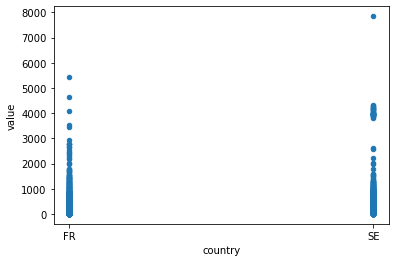

In [30]:
df_concat_pos.plot.scatter(x='country', y='value')

In [18]:
# trying several countries at a time 
# payload4 = {'limit': 1000, 'date_from' : '2017-01-01T00:00:00+00:00', 'date_to': '2022-07-21T09:35:00+00:00', 'country' : ['SE', 'PT', 'FR'], 'parameter': 'co'}
# req = requests.get(base_url + '/measurements', params = payload4)
# df_req = pd.DataFrame(req.json()['results'])

# df_req.country.value_counts()

# ceci marche mais les pays sont pas équilibrés car premier arrivé premier servi (avec la limite aproximative)


In [15]:
# from urllib.request import urlopen
# import json
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})


# fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            scope="usa",
#                            labels={'unemp':'unemployment rate'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [44]:
def extr_long(dic):
    """Extrait la valeur de la clé Longitude"""
    return dic['longitude']

def extr_lat(dic):
    return dic['latitude']

df_concat_pos['longitude'] = df_concat_pos['coordinates'].apply(extr_long)
df_concat_pos['latitude'] = df_concat_pos['coordinates'].apply(extr_lat)

/tmp/ipykernel_8246/4244292241.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_8246/4244292241.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



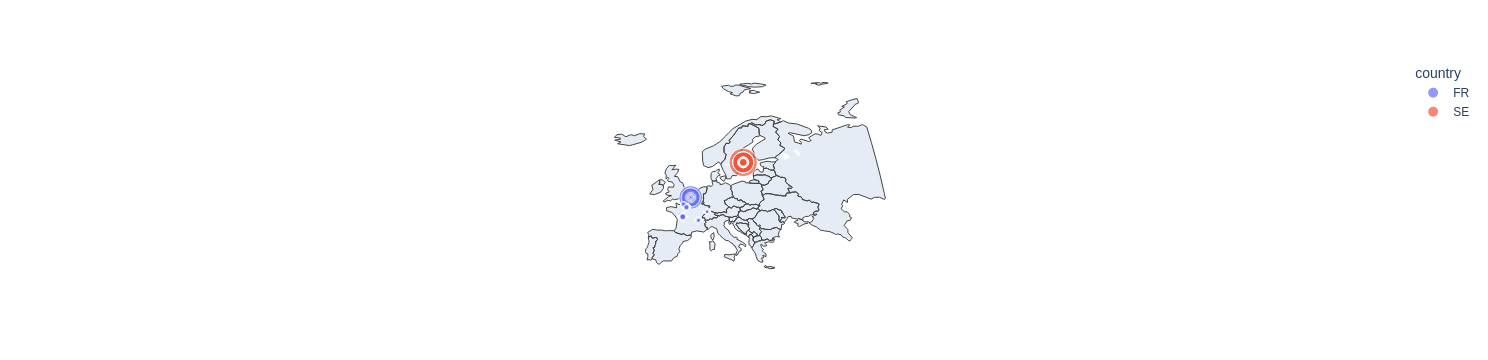

In [52]:
import plotly.express as px
# df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df_concat_pos, lat='latitude', lon='longitude', size="value", color='country', hover_name='city', projection='natural earth', scope="europe")
fig.show()

In [57]:
map_code_nom = {'FR' : 'France', 'SE' : 'Sweden'}
df_concat_pos['country_name'] = df_concat_pos.country.replace(map_code_nom)
df_concat_pos

/tmp/ipykernel_8246/1756999599.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType,longitude,latitude,country_name
0,3468,FR10034,co,185.000,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 51.0244512162806, 'longitude': 2....",FR,Nord,False,False,government,reference grade,2.302149,51.024451,France
1,3479,FR05083,co,161.000,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.5027376236243, 'longitude': 0....",FR,Seine-Maritime,False,False,government,reference grade,0.232486,49.502738,France
2,2680,FR20069,co,106.000,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 45.7748381342459, 'longitude': 4....",FR,Rhône,False,False,government,reference grade,4.898576,45.774838,France
3,3598,FR11034,co,240.000,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 50.7065553864362, 'longitude': 3....",FR,Nord,False,False,government,reference grade,3.180656,50.706555,France
4,3673,FR09404,co,427.000,"{'utc': '2022-07-21T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 46.5839094193576, 'longitude': 0....",FR,Vienne,False,False,government,reference grade,0.345556,46.583909,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20594,9474,SE0027A,co,597.493,"{'utc': '2021-07-18T14:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade,18.058620,59.341110,Sweden
20595,9474,SE0027A,co,591.437,"{'utc': '2021-07-18T13:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade,18.058620,59.341110,Sweden
20596,9474,SE0027A,co,594.138,"{'utc': '2021-07-18T12:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade,18.058620,59.341110,Sweden
20597,9474,SE0027A,co,602.914,"{'utc': '2021-07-18T11:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 59.3411099995295, 'longitude': 18...",SE,Stockholm,False,False,government,reference grade,18.058620,59.341110,Sweden


In [60]:
df_group

,country,locationId,value,isMobile,isAnalysis,longitude,latitude
0,FR,44508485,2.316637e+06,0,0,59068.307962,561844.582863
1,SE,75308826,3.332270e+06,0,0,143547.970380,471702.483386


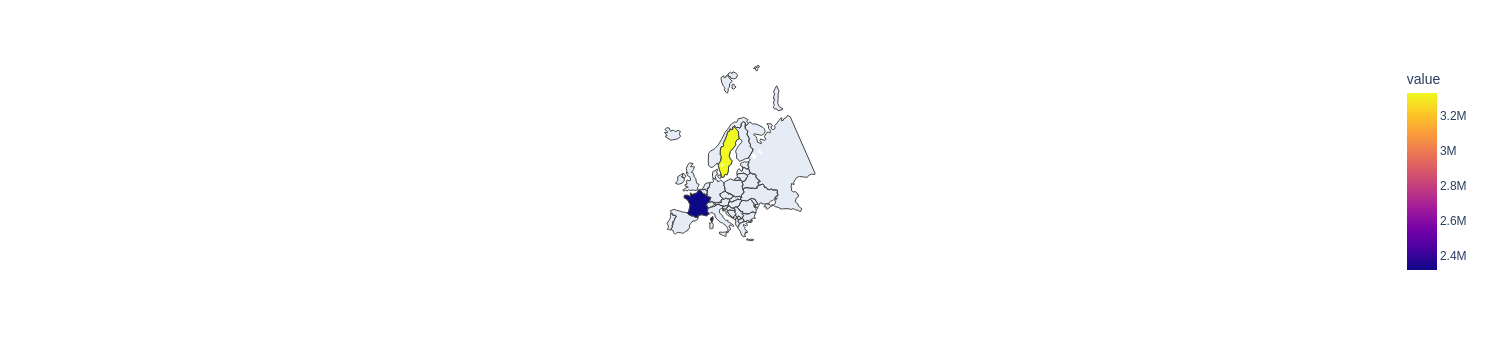

In [61]:
df_group = df_concat_pos.groupby(df_concat_pos['country']).sum().reset_index()
map_code_nom = {'FR' : 'France', 'SE' : 'Sweden'}
df_group['country_name'] = df_group.country.replace(map_code_nom)
fig = px.choropleth(df_group, color='value', locationmode='country names', locations = 'country_name', scope="europe")
fig.show()